# Load The Image Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Classiication_set.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

#Train Test Split

#Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
x_train=train_datagen.flow_from_directory("/content/Train",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 1266345 images belonging to 14 classes.


In [8]:
x_test=test_datagen.flow_from_directory("/content/Test",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 111308 images belonging to 14 classes.


In [9]:
x_train.class_indices

{'Abuse': 0,
 'Arrest': 1,
 'Arson': 2,
 'Assault': 3,
 'Burglary': 4,
 'Explosion': 5,
 'Fighting': 6,
 'NormalVideos': 7,
 'RoadAccidents': 8,
 'Robbery': 9,
 'Shooting': 10,
 'Shoplifting': 11,
 'Stealing': 12,
 'Vandalism': 13}

# CNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Hidden Layers

In [16]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [17]:
model.add(Dense(14,activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=1)

<ipython-input-19-b81035092734>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=1)


52765/52765 [==============================] - 19017s 360ms/step - loss: 0.1836 - accuracy: 0.9499 - val_loss: 3.8622 - val_accuracy: 0.4180


# Saving Model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 14)                2114      
                                                        

In [21]:
model.save('Crime_classification.h5')

In [27]:
!tar -zcvf crimeWeights.tgz Crime_classification.h5

Crime_classification.h5


#Testing the Model

In [28]:
#from tensorflow.keras import load_model
from keras import models
model = models.load_model('Crime_classification.h5')


In [65]:
# testing 1
from tensorflow.keras.utils import load_img, img_to_array 

test_image = load_img('"C:\Users\91637\Downloads\iS467921573-Vandalism.jpg"', target_size = (64, 64))
#test_image = img_to_array(test_image)





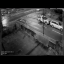

In [66]:
test_image

In [67]:
import numpy as np 
x = img_to_array(test_image)
x = np.expand_dims(x, axis =0)
x.shape

(1, 64, 64, 3)

In [68]:
pred = np.argmax(model.predict(x), axis = 1)
pred

1/1 [==============================] - 0s 48ms/step


array([9])

In [58]:
print(pred[0])

7


In [35]:
x_train.class_indices

{'Abuse': 0,
 'Arrest': 1,
 'Arson': 2,
 'Assault': 3,
 'Burglary': 4,
 'Explosion': 5,
 'Fighting': 6,
 'NormalVideos': 7,
 'RoadAccidents': 8,
 'Robbery': 9,
 'Shooting': 10,
 'Shoplifting': 11,
 'Stealing': 12,
 'Vandalism': 13}

In [37]:
index = ['Abuse',
 'Arrest',
 'Arson',
 'Assault',
 'Burglary',
 'Explosion',
 'Fighting',
 'Normal',
 'RoadAccidents',
 'Robbery',
 'Shooting',
 'Shoplifting',
 'Stealing',
 'Vandalism']



In [38]:
a = index[pred[0]]

In [39]:
print(a)

Normal
